<a href="https://colab.research.google.com/github/thedeenun/weather-prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Weather History Data จาก https://www.visualcrossing.com ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับข้อมูลสภาพอากาศของกรุงเทพมหานครในช่วงเวลาตั้งแต่ 01/01/2019 ถึง 31/08/2021 

โดย Data set ที่เลือกมา มีลักษณะดังนี้

* Data set characteristic : Multivariate
* Attribute characteristic : Real, Nominal, Data-time
* ไม่มี missing values
* จำนวน Instance: 243
* จำนวน Attribute: 17 ดังนี้
  1. Name : ชื่อสถานที่
  2. Date time : วันที่
  3. Maximum Temperature : อุณหภูมิสูงสุด
  4. Minimum Temperature : อุณหภูมิต่ำสุด
  5. Temperature : อุณหภูมิ
  6. Wind Chill : 
  7. Heat Index	:
  8. Precipitation :
  9. Snow :
  10. Snow Depth :
  11. Wind Speed :
  12. Wind Direction :
  13. Wind Gust	:
  14. Visibility :
  15. Cloud Cover :
  16. Relative Humidity	:
  17. Conditions :

###Data preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/WeatherHistory_data/WeatherHistory.csv')
dataset

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Bangkok,1/1/2019,29.4,21.2,25.3,NaN,30.5,0.00,NaN,NaN,17.6,110.63,NaN,9.6,24.0,64.24,Clear
1,Bangkok,1/2/2019,30.2,22.0,25.7,NaN,31.0,0.00,NaN,NaN,17.2,120.38,NaN,9.7,34.3,60.71,Partially cloudy
2,Bangkok,1/3/2019,27.2,22.8,25.1,NaN,28.0,0.00,NaN,NaN,20.2,181.21,NaN,9.6,53.6,61.93,Partially cloudy
3,Bangkok,1/4/2019,28.6,23.8,26.0,NaN,30.2,0.00,NaN,NaN,18.4,181.88,NaN,9.3,55.5,65.10,Partially cloudy
4,Bangkok,1/5/2019,28.2,24.5,26.1,NaN,30.3,0.00,NaN,NaN,17.6,93.00,44.6,8.6,64.0,70.55,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Bangkok,08/27/2021,28.3,24.7,26.3,NaN,34.6,32.40,NaN,NaN,16.2,134.00,NaN,9.1,76.7,92.56,"Rain, Overcast"
970,Bangkok,08/28/2021,29.6,24.0,26.5,NaN,36.7,39.83,NaN,NaN,15.7,137.25,NaN,9.5,69.0,90.27,"Rain, Partially cloudy"
971,Bangkok,08/29/2021,31.3,23.7,27.5,NaN,37.3,29.37,NaN,NaN,9.8,135.83,NaN,9.4,62.3,84.52,"Rain, Partially cloudy"
972,Bangkok,08/30/2021,32.4,26.2,28.8,NaN,40.3,0.80,NaN,NaN,11.6,158.83,NaN,10.0,52.2,82.25,"Rain, Partially cloudy"


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 974 non-null    object 
 1   Date time            974 non-null    object 
 2   Maximum Temperature  974 non-null    float64
 3   Minimum Temperature  974 non-null    float64
 4   Temperature          974 non-null    float64
 5   Wind Chill           0 non-null      float64
 6   Heat Index           970 non-null    float64
 7   Precipitation        974 non-null    float64
 8   Snow                 0 non-null      float64
 9   Snow Depth           0 non-null      float64
 10  Wind Speed           974 non-null    float64
 11  Wind Direction       974 non-null    float64
 12  Wind Gust            250 non-null    float64
 13  Visibility           974 non-null    float64
 14  Cloud Cover          974 non-null    float64
 15  Relative Humidity    974 non-null    flo

In [7]:
dataset.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
count,974.000000,974.000000,974.000000,0.0,970.000000,974.000000,0.0,0.0,974.000000,974.000000,250.000000,974.000000,974.000000,974.000000
mean,33.558008,25.861602,29.317864,NaN,39.430412,7.361550,NaN,NaN,19.557495,173.093552,40.881600,9.439630,41.841786,71.506366
std,2.066881,2.019495,1.782993,NaN,3.968050,15.424199,NaN,NaN,5.263487,50.326944,9.387331,0.680434,13.018844,8.115086
min,26.000000,16.000000,21.300000,NaN,27.300000,0.000000,NaN,NaN,9.000000,16.830000,22.300000,6.500000,4.700000,46.580000
25%,32.500000,25.000000,28.500000,NaN,37.225000,0.000000,NaN,NaN,15.925000,145.592500,35.300000,9.200000,33.800000,66.810000
50%,33.700000,26.000000,29.400000,NaN,39.900000,0.000000,NaN,NaN,18.900000,180.415000,38.900000,9.700000,41.800000,71.545000
75%,34.800000,27.000000,30.400000,NaN,42.100000,7.725000,NaN,NaN,22.575000,208.525000,44.600000,9.900000,50.200000,76.422500
max,39.300000,30.500000,33.500000,NaN,51.400000,123.250000,NaN,NaN,45.200000,267.040000,81.700000,11.100000,94.600000,95.290000


In [8]:
dataset.shape

(974, 17)

In [9]:
dataset.isnull().sum()

Name                     0
Date time                0
Maximum Temperature      0
Minimum Temperature      0
Temperature              0
Wind Chill             974
Heat Index               4
Precipitation            0
Snow                   974
Snow Depth             974
Wind Speed               0
Wind Direction           0
Wind Gust              724
Visibility               0
Cloud Cover              0
Relative Humidity        0
Conditions               0
dtype: int64

In [10]:
dataset.drop('Wind Chill', axis=1, inplace=True)
dataset.drop('Snow', axis=1, inplace=True)
dataset.drop('Snow Depth', axis=1, inplace=True)
dataset.drop('Wind Gust', axis=1, inplace=True)

In [11]:
dataset[dataset.isna().any(axis=1)]

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
651,Bangkok,10/13/2020,26.2,24.0,25.1,NaN,26.91,15.3,197.29,8.3,83.6,90.37,"Rain, Overcast"
655,Bangkok,10/17/2020,26.2,24.0,24.9,NaN,46.90,17.4,224.92,8.4,86.1,95.29,"Rain, Overcast"
656,Bangkok,10/18/2020,26.0,22.0,23.8,NaN,13.28,15.4,114.17,8.3,94.6,92.04,"Rain, Overcast"
742,Bangkok,1/12/2021,26.4,17.0,21.3,NaN,0.00,18.6,69.83,9.3,30.5,53.35,Partially cloudy


In [12]:
dataset['Heat Index'].mean()

39.430412371134

In [13]:
dataset = dataset.fillna(dataset['Heat Index'].mean())

In [15]:
dataset.iloc[651]

Name                          Bangkok
Date time                  10/13/2020
Maximum Temperature              26.2
Minimum Temperature                24
Temperature                      25.1
Heat Index                    39.4304
Precipitation                   26.91
Wind Speed                       15.3
Wind Direction                 197.29
Visibility                        8.3
Cloud Cover                      83.6
Relative Humidity               90.37
Conditions             Rain, Overcast
Name: 651, dtype: object

In [16]:
dataset.isnull().sum()

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Heat Index             0
Precipitation          0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64

In [17]:
dataset.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
969,Bangkok,08/27/2021,28.3,24.7,26.3,34.6,32.40,16.2,134.00,9.1,76.7,92.56,"Rain, Overcast"
970,Bangkok,08/28/2021,29.6,24.0,26.5,36.7,39.83,15.7,137.25,9.5,69.0,90.27,"Rain, Partially cloudy"
971,Bangkok,08/29/2021,31.3,23.7,27.5,37.3,29.37,9.8,135.83,9.4,62.3,84.52,"Rain, Partially cloudy"
972,Bangkok,08/30/2021,32.4,26.2,28.8,40.3,0.80,11.6,158.83,10.0,52.2,82.25,"Rain, Partially cloudy"
973,Bangkok,08/31/2021,30.9,25.0,28.4,38.1,16.94,12.1,189.79,9.5,70.2,84.46,"Rain, Partially cloudy"


In [18]:
dataset.corr().round(2)

,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.00,0.69,0.90,0.81,-0.10,0.17,0.29,0.24,-0.28,-0.19
Minimum Temperature,0.69,1.00,0.89,0.80,-0.06,0.29,0.47,0.34,0.23,0.23
Temperature,0.90,0.89,1.00,0.86,-0.12,0.24,0.41,0.34,-0.05,-0.04
Heat Index,0.81,0.80,0.86,1.00,0.12,0.27,0.46,0.30,0.15,0.27
Precipitation,-0.10,-0.06,-0.12,0.12,1.00,0.06,0.08,0.01,0.39,0.45
Wind Speed,0.17,0.29,0.24,0.27,0.06,1.00,0.29,0.31,0.18,0.07
Wind Direction,0.29,0.47,0.41,0.46,0.08,0.29,1.00,0.18,0.32,0.28
Visibility,0.24,0.34,0.34,0.30,0.01,0.31,0.18,1.00,0.13,-0.08
Cloud Cover,-0.28,0.23,-0.05,0.15,0.39,0.18,0.32,0.13,1.00,0.76
Relative Humidity,-0.19,0.23,-0.04,0.27,0.45,0.07,0.28,-0.08,0.76,1.00


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset['Conditions'].value_counts()

Rain, Partially cloudy    455
Partially cloudy          417
Clear                      90
Rain, Overcast             11
Rain                        1
Name: Conditions, dtype: int64

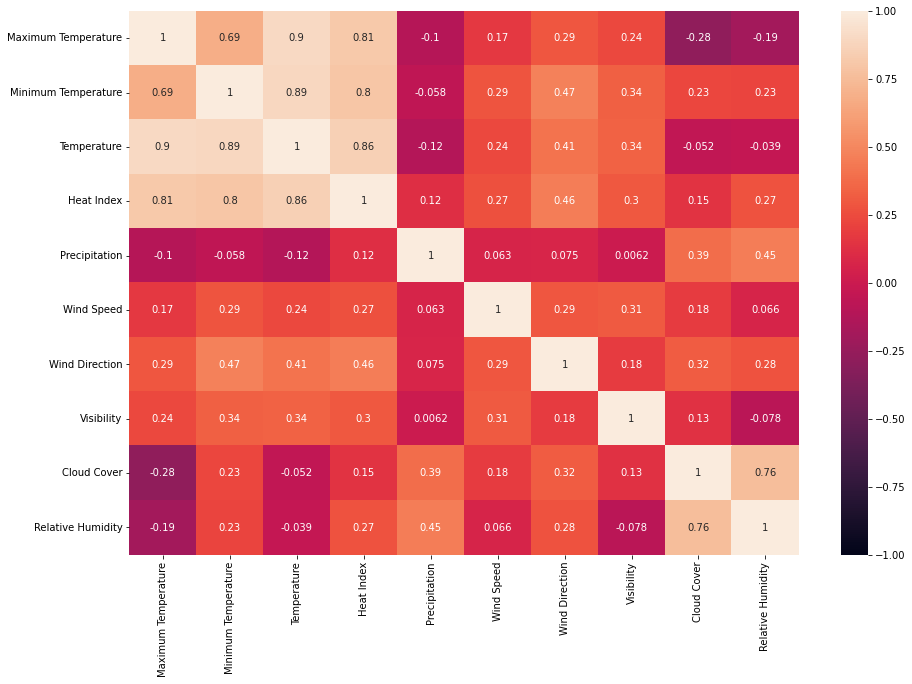

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

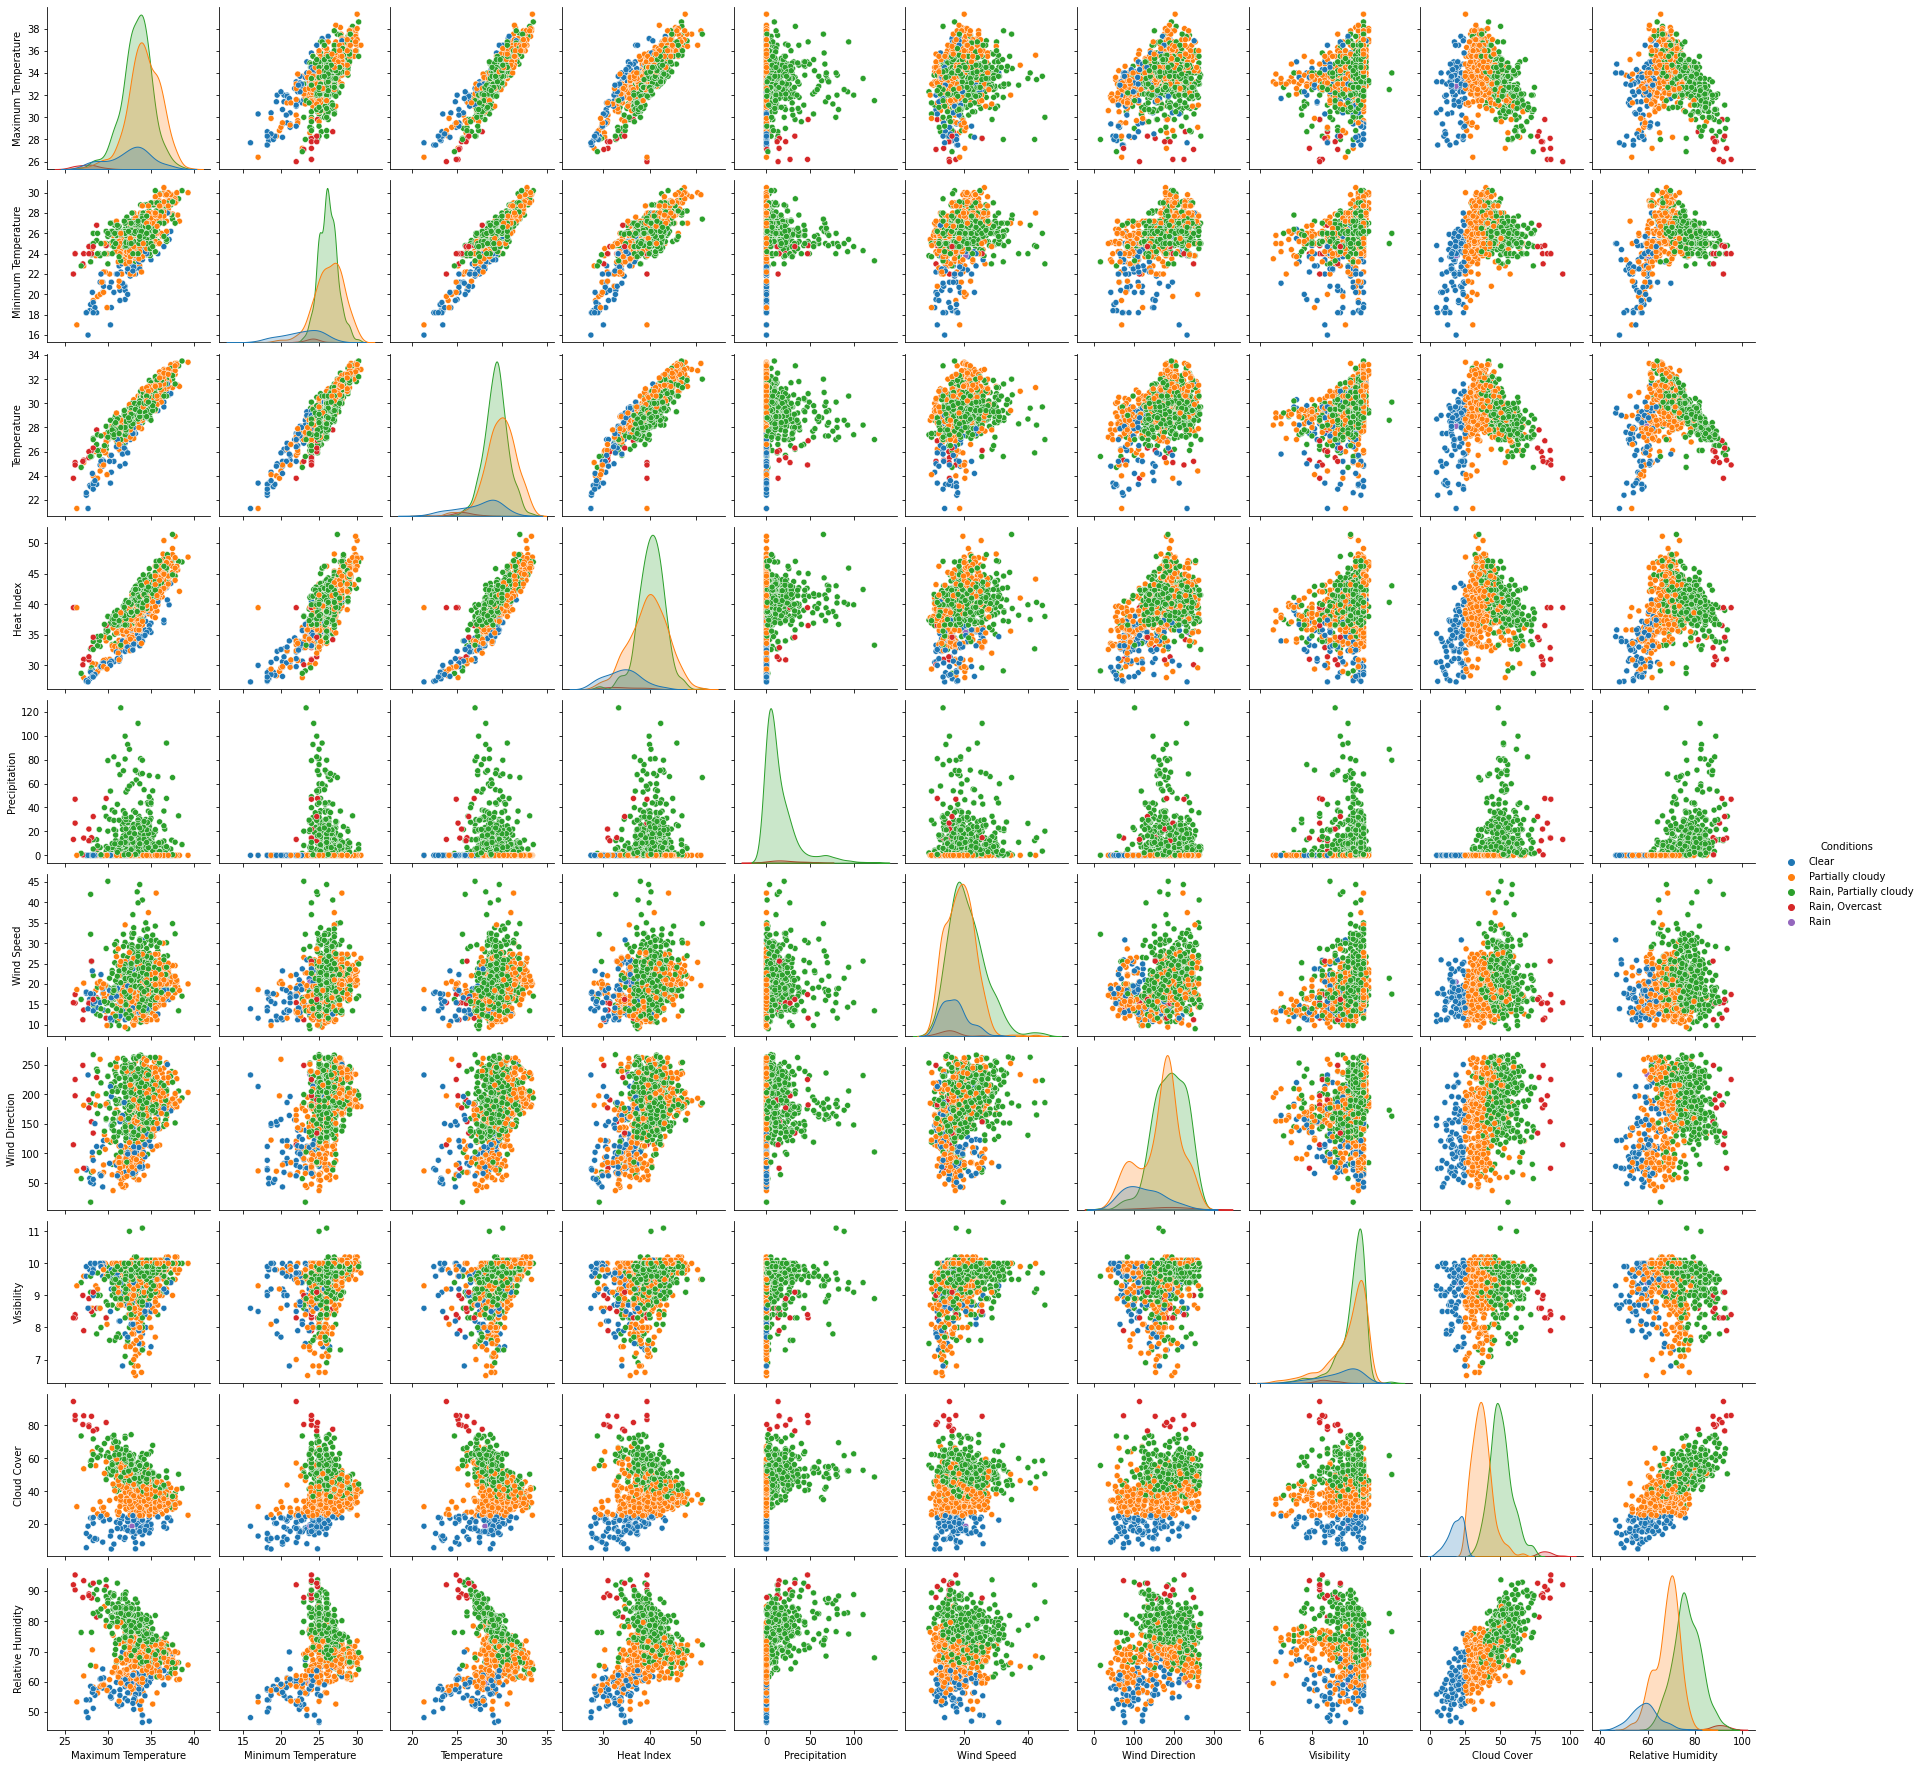

In [19]:
sns.pairplot(dataset, hue='Conditions')

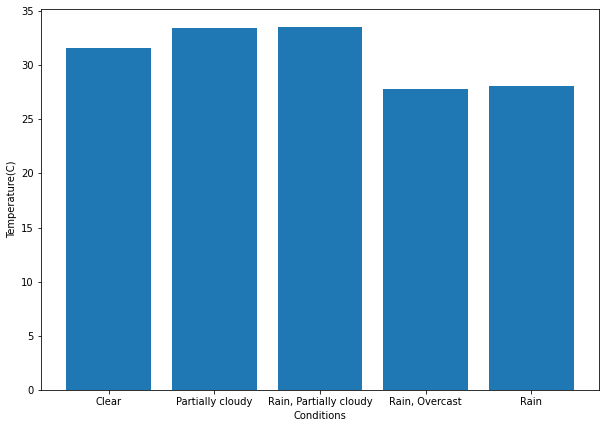

In [43]:
fig = plt.figure(figsize =(10, 7))
plt.bar(dataset['Conditions'], dataset['Temperature'])
plt.xlabel('Conditions')
plt.ylabel('Temperature(C)')
plt.show()

In [1]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(dataset['Conditions'], dataset['Temperature'])
axs[0, 0].set_title('')
axs[0, 1].bar(dataset['Conditions'], dataset['Temperature'], 'tab:orange')
axs[0, 1].set_title('')
axs[1, 0].bar(dataset['Conditions'], dataset['Temperature'], 'tab:green')
axs[1, 0].set_title('')
axs[1, 1].bar(dataset['Conditions'], dataset['Temperature'], 'tab:red')
axs[1, 1].set_title('')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


NameError: ignored

###Build Model


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = dataset.iloc[:,2:12].values
y = dataset.iloc[:, 12].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [23]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 24   1   0   0]
 [  2 124   0   3]
 [  0   0   1   2]
 [  0   4   1 131]]
                        precision    recall  f1-score   support

                 Clear       0.92      0.96      0.94        25
      Partially cloudy       0.96      0.96      0.96       129
        Rain, Overcast       0.50      0.33      0.40         3
Rain, Partially cloudy       0.96      0.96      0.96       136

              accuracy                           0.96       293
             macro avg       0.84      0.80      0.82       293
          weighted avg       0.95      0.96      0.95       293



In [30]:
print("Test new example")
z_test = [[28.3	, 19.2, 23.3, 28.4, 0.0, 15.2, 55.42, 9.8, 20.4, 57.56]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[29.6,	24.0,	26.5,	36.7,	39.83,	15.7,	137.25,	9.5,	69.0,	90.27]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[28.3,	24.7,	26.3,	34.6,	32.40,	16.2,	134.00,	9.1,	76.7,	92.56]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

Test new example
['Clear']
['Rain, Partially cloudy']
['Rain, Partially cloudy']


###Clustering